### Simplified AR model:

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
from statsmodels.tsa.ar_model import AR,ARResults

In [3]:
pop = pd.read_csv("C:\\Users\\shaleens\\Desktop\\Projects\\TimeSeriesUdacity\\TS Udemy Vids\\Time Series 2\\US Population.csv", index_col=0, parse_dates=True)

In [4]:
pop.head()

,Population
Date,
1959-01-01,175818
1959-02-01,176044
1959-03-01,176274
1959-04-01,176503
1959-05-01,176723


In [5]:
pop.index.freq= "MS"

In [6]:
pop.index

DatetimeIndex(['1959-01-01', '1959-02-01', '1959-03-01', '1959-04-01',
               '1959-05-01', '1959-06-01', '1959-07-01', '1959-08-01',
               '1959-09-01', '1959-10-01',
               ...
               '2019-03-01', '2019-04-01', '2019-05-01', '2019-06-01',
               '2019-07-01', '2019-08-01', '2019-09-01', '2019-10-01',
               '2019-11-01', '2019-12-01'],
              dtype='datetime64[ns]', name='Date', length=732, freq='MS')

In [7]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 732 entries, 1959-01-01 to 2019-12-01
Freq: MS
Data columns (total 1 columns):
Population    732 non-null int64
dtypes: int64(1)
memory usage: 11.4 KB


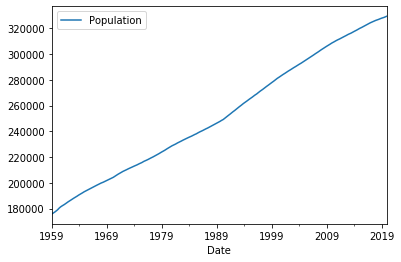

In [8]:
pop.plot()

In [54]:
train = pop.iloc[:721]
test = pop.iloc[721:]
train

,Population
Date,
1959-01-01,175818
1959-02-01,176044
1959-03-01,176274
1959-04-01,176503
1959-05-01,176723
...,...
2018-09-01,327328
2018-10-01,327477
2018-11-01,327607


In [55]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
model = AR(train['Population'])

In [57]:
AR1_fit = model.fit(maxlag=1) 

In [58]:
AR1_fit.aic

7.652538139974572

In [59]:
AR1_fit.k_ar

1

In [60]:
AR1_fit.params

const            206.642977
L1.Population      1.000018
dtype: float64

In [61]:
start = len(train)

In [62]:
end = len(train) + len(test) -1

In [63]:
start, end

(721, 731)

In [64]:
AR1_fit.predict(start=start, end=end)

2019-02-01    328036.476957
2019-03-01    328248.957694
2019-04-01    328461.442213
2019-05-01    328673.930514
2019-06-01    328886.422596
2019-07-01    329098.918459
2019-08-01    329311.418104
2019-09-01    329523.921531
2019-10-01    329736.428740
2019-11-01    329948.939730
2019-12-01    330161.454502
Freq: MS, dtype: float64

In [65]:
test.head()

,Population
Date,
2019-02-01,327921
2019-03-01,328025
2019-04-01,328140
2019-05-01,328267
2019-06-01,328404


In [66]:
pred1 = AR1_fit.predict(start=start, end=end)

In [67]:
pred1 = pred1.rename('AR1_Prediction')

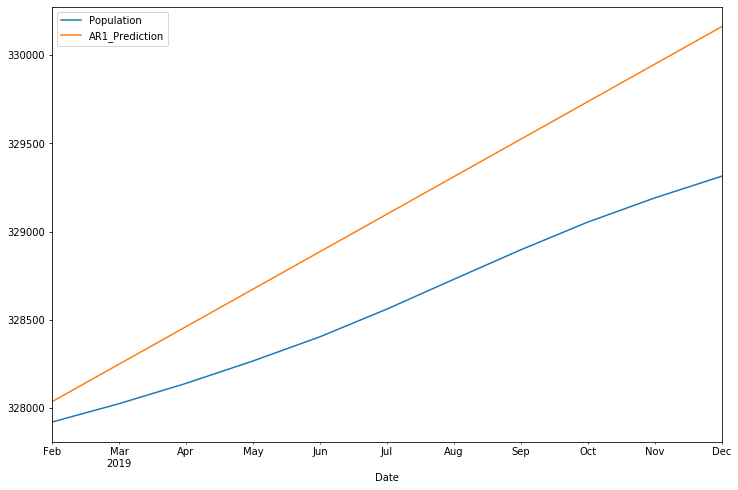

In [68]:
test.plot(figsize=(12,8), legend=True)
pred1.plot(legend = True)

In [69]:
#Lets check if we can improve using AR(2):

In [70]:
AR2_fit = model.fit(maxlag=2)

In [71]:
AR2_fit.params

const            13.619050
L1.Population     1.940193
L2.Population    -0.940198
dtype: float64

In [72]:
pred2 = AR2_fit.predict(start=start, end= end)

In [73]:
pred2 = pred2.rename("AR2_Predictions")

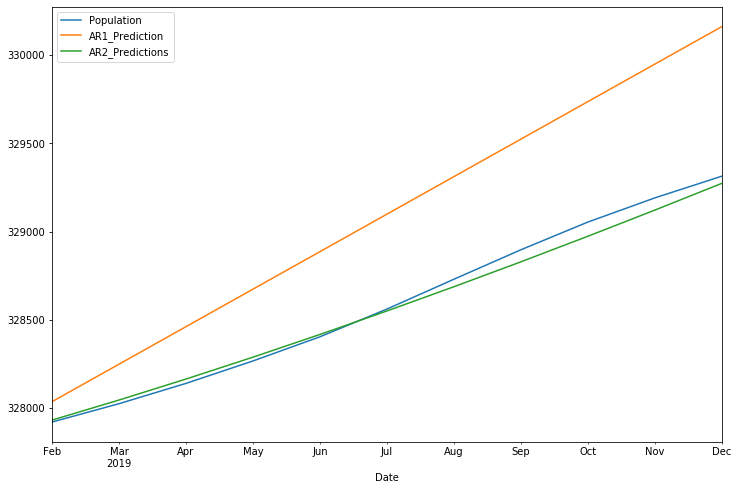

In [74]:
test.plot(figsize=(12,8), legend=True)
pred1.plot(legend = True)
pred2.plot(legend=True)

In [75]:
# Lets us let the statsmodels figure out the value of lag:


ARfit = model.fit(ic="t-stat") #ic is info criterion.

In [76]:
ARfit.params

const             3.595986
L1.Population     2.188270
L2.Population    -1.624893
L3.Population     0.719941
L4.Population    -0.489745
L5.Population     0.294494
L6.Population    -0.143484
L7.Population     0.018274
L8.Population     0.072811
L9.Population     0.042285
L10.Population   -0.172074
L11.Population    0.303403
L12.Population   -0.129317
L13.Population   -0.099738
L14.Population   -0.147201
L15.Population    0.187870
L16.Population   -0.102437
L17.Population    0.142785
L18.Population   -0.105794
L19.Population    0.120720
L20.Population   -0.076168
dtype: float64

In [77]:
pred20 = ARfit.predict(start,end)
pred20 = pred20.rename("AR20_Prediction")

In [78]:
from sklearn.metrics import mean_squared_error

In [79]:
labels =  ['AR1','AR2','AR20']

In [80]:
preds = [pred1,pred2,pred20]

In [81]:
for i in range(3):
    error = mean_squared_error(test['Population'], preds[i])
    print(f'{labels[i]} MSE is :{error}')

AR1 MSE is :303994.15607351816
AR2 MSE is :1935.6845789984138
AR20 MSE is :609.1799061713647


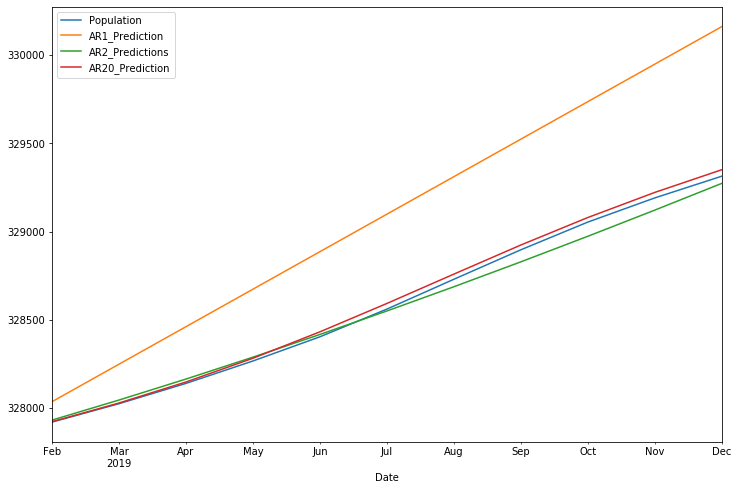

In [82]:
test.plot(figsize=(12,8), legend=True)
pred1.plot(legend = True)
pred2.plot(legend=True)
pred20.plot(legend=True)

In [83]:
# Thus we saw, using the statsmodel to get the argmax value, we almost managed to get our graph on top of the actual population data!

In [86]:
# Forecasting Future i.e. year 2020:

# Now for final forecasting, we will be rebuilding the model based on the entire dataset!

model = AR(pop['Population'])
AR_fit = model.fit()

In [94]:
forecasted_values = AR_fit.predict(start=len(pop), end = len(pop)+24)

In [95]:
forecasted_values = forecasted_values.rename('Forecast')

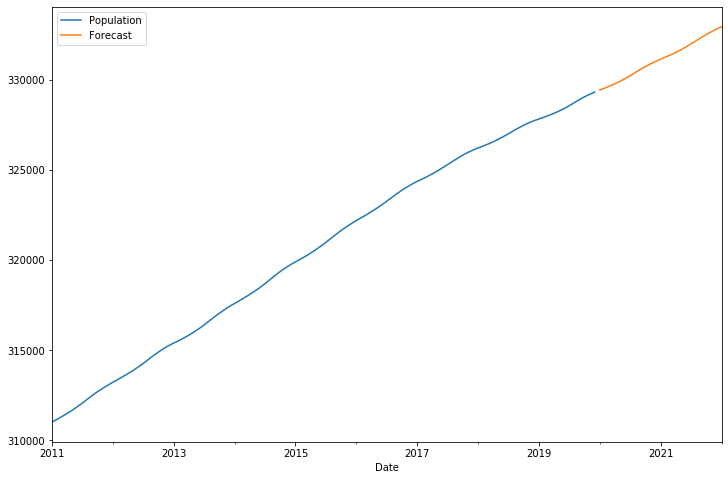

In [96]:
pop['Population']['2011-01-01':].plot(figsize=(12,8), legend=True)
forecasted_values.plot(legend=True)

In [97]:
# Thus, we managed to forecast the values using AR model!